In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import uproot # uproot examples: https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf

In [3]:
from matplotlib import colors
cmap_blue = plt.cm.Blues
cmaplist_blue = [cmap_blue(i) for i in range(cmap_blue.N)]
cmap_blue = colors.LinearSegmentedColormap.from_list('mcm',cmaplist_blue[int(len(cmaplist_blue)*1/4):], cmap_blue.N)

cmap_red = plt.cm.Reds
cmaplist_red = [cmap_red(i) for i in range(cmap_red.N)]
cmap_red = colors.LinearSegmentedColormap.from_list('mcm',cmaplist_red[int(len(cmaplist_red)*1/4):], cmap_red.N)
# based on https://stackoverflow.com/questions/43384448/modifying-viridis-colormap-replacing-some-colors-in-matplotlib

In [4]:
def GetCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
               & (tree['passed_z_thresh'].array() == True) \
               & (tree['n_x_ch_abovenoise'].array() > 0) \
               & (tree['n_y_ch_abovenoise'].array() > 0) \
               & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
               & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
               & (tree['standoff'].array() > 0) \
               & (tree['m_DNNvalue'].array() > 0.0) \
               & (tree['energy'].array() > 2435) \
               & (tree['energy'].array() < 2474) \
              )
    return cut         

In [5]:
def density_estimation(m1, m2):
    X, Y = np.mgrid[np.min(m1):np.max(m1):100j, np.min(m2):np.max(m2):100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

In [6]:
File = "/p/vast1/nexo/data/merged-v8/Baseline2019_%s_%s.root"

In [7]:
bb0n = uproot.open(File % ('bb0n', 'FullLXe'))['tree']
bb0n_cut = GetCut(bb0n)

In [8]:
th232 = uproot.open(File % ('Th232', 'TPCVessel'))['tree']
th232_cut = GetCut(th232)

In [9]:
u238 = uproot.open(File % ('U238', 'TPCVessel'))['tree']
u238_cut = GetCut(u238)

In [10]:
m1 = th232['m_DNNvalue'].array()[th232_cut]
m2 = th232['standoff'].array()[th232_cut]

In [11]:
m3 = bb0n['m_DNNvalue'].array()[bb0n_cut][::100]
m4 = bb0n['standoff'].array()[bb0n_cut][::100]

In [12]:
m5 = u238['m_DNNvalue'].array()[u238_cut]
m6 = u238['standoff'].array()[u238_cut]

In [13]:
X,Y,Z = density_estimation(m1,m2)

In [14]:
X2,Y2,Z2 = density_estimation(m3,m4)

In [15]:
X3,Y3,Z3 = density_estimation(m5,m6)

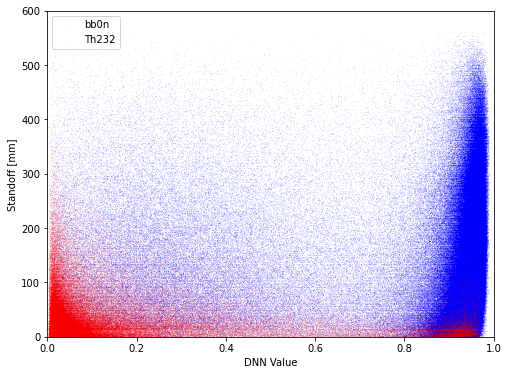

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(m3,m4, label='bb0n', color='blue', s=0.001)
plt.scatter(m1,m2, label='Th232', color='red', s=0.001)
plt.xlabel('DNN Value')
plt.ylabel('Standoff [mm]')
plt.xlim(0,1)
plt.ylim(0,600)
plt.legend(loc='upper left')
plt.savefig('scatter_th232_bb0n_dnn_standoff.png', dpi=300, bbox_inches='tight')

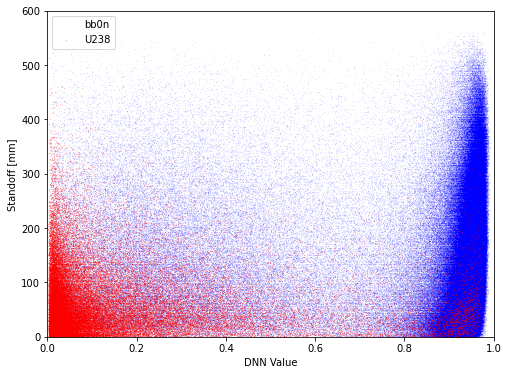

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(m3,m4, label='bb0n', color='blue', s=0.001)
plt.scatter(m5,m6, label='U238', color='red', s=0.01)
plt.xlabel('DNN Value')
plt.ylabel('Standoff [mm]')
plt.xlim(0,1)
plt.ylim(0,600)
plt.legend(loc='upper left')
plt.savefig('scatter_u238_bb0n_dnn_standoff.png', dpi=300, bbox_inches='tight')

360


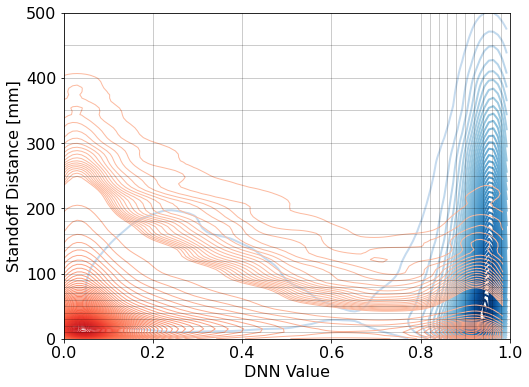

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))   
plt.xlim(0,1)
plt.ylim(0,500)
plt.xlabel('DNN Value', fontsize=16)
plt.ylabel('Standoff Distance [mm]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


levels=np.linspace(0,0.001,20)
levels=np.append(levels[:-1], np.linspace(0.001,0.1,100))

contour2 = ax.contour(X2,Y2,Z2, levels=50, extend='both', cmap=cmap_blue, linewidths=2)
contour1 = ax.contour(X,Y,Z, levels=levels, extend='both', cmap=cmap_red, linewidths=1)

# for x in np.linspace(0,1,6):
#     ax.axvline(x, color='k', lw=1, alpha=0.2)
# for x in np.linspace(0,650,25):
#     ax.axhline(x, color='k', lw=1, alpha=0.2)

xbins = np.linspace(0,0.8,5)
xbins = np.append(xbins[:-1], np.linspace(0.8,1.0,11))
for x in xbins:
    ax.axvline(x, color='k', lw=1, alpha=0.2)
    
ybins = np.linspace(0,100,11)
ybins = np.append(ybins[:-1], np.linspace(100,200,6))
ybins = np.append(ybins[:-1], np.linspace(200,600,9))
for x in ybins:
    ax.axhline(x, color='k', lw=1, alpha=0.2)

print(len(xbins)*len(ybins))

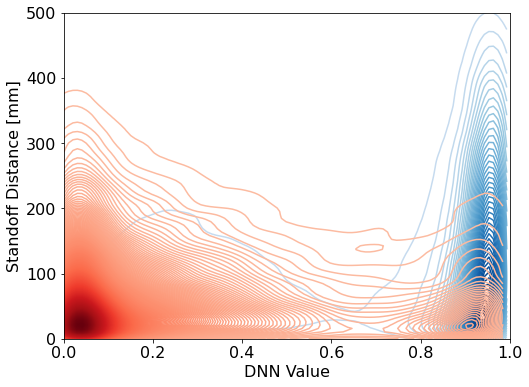

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))   
plt.xlim(0,1)
plt.ylim(0,500)
plt.xlabel('DNN Value', fontsize=16)
plt.ylabel('Standoff Distance [mm]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

contour2 = ax.contour(X2,Y2,Z2, levels=50, extend='both', cmap=cmap_blue)
contour1 = ax.contour(X3,Y3,Z3, levels=500, extend='both', cmap=cmap_red)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

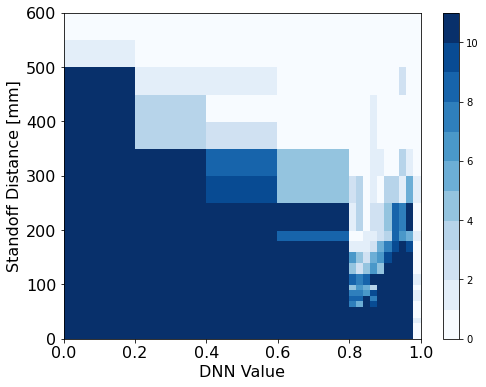

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))   
H, xedges, yedges = np.histogram2d(m1,m2, bins=(xbins,ybins))
H = H.T
XBins, YBins = np.meshgrid(xedges, yedges)

# define the bins and normalize, see here: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolormesh_levels.html
cmap = plt.cm.Blues
bounds = np.array([0,1,2,3,4,5,6,7,8,9,10,1000])
norm = colors.BoundaryNorm(bounds, cmap.N)


im = ax.pcolormesh(XBins, YBins, H, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)

plt.xlim(0,1)
plt.ylim(0,600)
plt.xlabel('DNN Value', fontsize=16)
plt.ylabel('Standoff Distance [mm]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

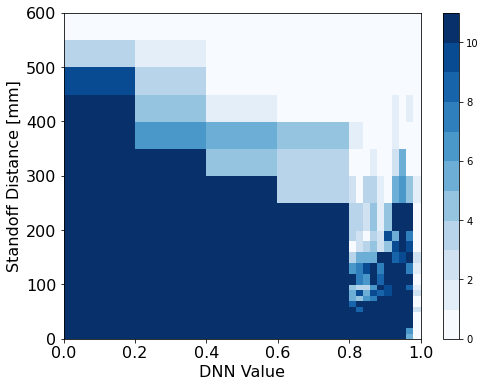

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))   
H, xedges, yedges = np.histogram2d(m5,m6, bins=(xbins,ybins))
H = H.T
XBins, YBins = np.meshgrid(xedges, yedges)

# define the bins and normalize, see here: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolormesh_levels.html
cmap = plt.cm.Blues
bounds = np.array([0,1,2,3,4,5,6,7,8,9,10,1000])
norm = colors.BoundaryNorm(bounds, cmap.N)


im = ax.pcolormesh(XBins, YBins, H, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)

plt.xlim(0,1)
plt.ylim(0,600)
plt.xlabel('DNN Value', fontsize=16)
plt.ylabel('Standoff Distance [mm]', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)